In [5]:
from seligator.main import Seligator
from seligator.prediction.tests import run_tests

# sel = Seligator.load_model("saved_model_nometadata")
sel = Seligator.load_model("models/model--LinearVanillaAggloMSD-EnriLSTM-Pretrained")
sel.model.cuda()
reader = sel.get_reader()
sel.model

INFO:allennlp.data.vocabulary:Loading token dictionary from models/model--LinearVanillaAggloMSD-EnriLSTM-Pretrained/vocabulary.
INFO:filelock:Lock 140529264590080 acquired on models/model--LinearVanillaAggloMSD-EnriLSTM-Pretrained/vocabulary/.lock
INFO:filelock:Lock 140529264590080 released on models/model--LinearVanillaAggloMSD-EnriLSTM-Pretrained/vocabulary/.lock
INFO:root:Fitting the BasisVectorConfiguration
INFO:root:Dataset reader set with following categories: [msd], lemma_char, lemma
INFO:root:Indexer set for following categories: [msd], lemma_char, lemma


FeatureEmbeddingClassifier(
  (_loss): CrossEntropyLoss()
  (mixed_encoder): MixedEmbeddingEncoder(
    (_emb_dropout): Dropout(p=0.3, inplace=False)
    (features_embedder): FeatureAndTextEmbedder(
      (text_embedder): BasicTextFieldEmbedder(
        (token_embedder_lemma): Embedding()
        (token_embedder_lemma_char): TokenCharactersEncoder(
          (_embedding): TimeDistributed(
            (_module): Embedding()
          )
          (_encoder): TimeDistributed(
            (_module): LstmSeq2VecEncoder(
              (_module): LSTM(100, 150, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)
            )
          )
          (_dropout): Dropout(p=0.3, inplace=False)
        )
      )
      (feature_embedder): Linear(in_features=52, out_features=20, bias=True)
    )
    (features_encoder): MetadataEnrichedAttentionalLSTM(
      (lstm): BasisCustBiLSTM(
        (Century): Embedding(13, 64)
        (Textgroup): Embedding(212, 64)
        (WrittenType): Embeddi

Evaluating


INFO:allennlp.training.util:Iterating over dataset


0it [00:00, ?it/s]

Evaluating: Predicting


/home/thibault/dev/est-lascivuum-non-est/seligator/prediction/tests.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  disp.figure_.show()


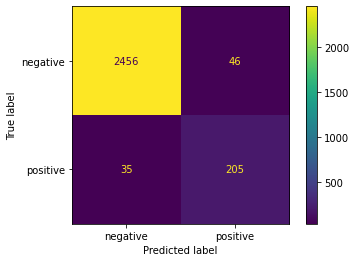

In [6]:
data, img = run_tests(
    "dataset/main/test.txt",
    dataset_reader=reader,
    model=sel.model
)

In [7]:
from seligator.prediction.html import predictions_to_html

# Do Ausone
output = sel.predict_on_xml(
    "/home/thibault/dev/latin-lemmatized-texts/lemmatized/xml/urn:cts:latinLit:stoa0045.stoa003.perseus-lat2.xml",
     metadata={
        "Century": "4",
        #"CitationTypes": "line",
        #"Textgroup": "urn:cts:latinLit:stoa0045",
        "WrittenType": "versified"
})
with open("ausone-as-ausone.html", "w") as f:
    f.write(predictions_to_html(output, show_class=False))

# Same with Virgile
output = sel.predict_on_xml(
    "/home/thibault/dev/latin-lemmatized-texts/lemmatized/xml/urn:cts:latinLit:stoa0045.stoa003.perseus-lat2.xml",
     metadata={
        "Century": "-1",
        #"CitationTypes": "poem,line",
        #"Textgroup": "urn:cts:latinLit:phi0690",
        "WrittenType": "versified"
})
with open("ausone-as-virgile.html", "w") as f:
    f.write(predictions_to_html(output, show_class=False))
    
# Virgine Aeneid
output = sel.predict_on_xml(
    "/home/thibault/dev/latin-lemmatized-texts/lemmatized/xml/urn:cts:latinLit:phi0690.phi003.perseus-lat2.xml",
     metadata={
        "Century": "-1",
        "CitationTypes": "poem,line",
        #"Textgroup": "urn:cts:latinLit:phi0690",
        "WrittenType": "versified"
})
with open("virgile-as-virgile.html", "w") as f:
    f.write(predictions_to_html(output, show_class=False))
    
# Martial as Martial
output = sel.predict_on_xml(
    "/home/thibault/dev/latin-lemmatized-texts/lemmatized/xml/urn:cts:latinLit:phi1294.phi002.perseus-lat2.xml",
     metadata={
        "Century": "1",
        #"CitationTypes": "book,poem,line",
        #"Textgroup": "urn:cts:latinLit:phi1294",
        "WrittenType": "versified"
})
with open("martial-as-martial.html", "w") as f:
    f.write(predictions_to_html(output, show_class=False))
    
# Martial as Cicero
output = sel.predict_on_xml(
    "/home/thibault/dev/latin-lemmatized-texts/lemmatized/xml/urn:cts:latinLit:phi1294.phi002.perseus-lat2.xml",
     metadata={
        "Century": "1",
        #"CitationTypes": "book,poem,line",
        #"Textgroup": "urn:cts:latinLit:phi0474",
        "WrittenType": "versified"
})
with open("martial-as-cicero.html", "w") as f:
    print(output[0])
    f.write(predictions_to_html(output, show_class=True))

INFO:root:Dataset reader set with following categories: [msd], lemma_char, lemma
/home/thibault/dev/est-lascivuum-non-est/env/lib/python3.8/site-packages/allennlp/data/token_indexers/token_characters_indexer.py:55: UserWarning: You are using the default value (0) of `min_padding_length`, which can cause some subtle bugs (more info see https://github.com/allenai/allennlp/issues/1954). Strongly recommend to set a value, usually the maximum size of the convolutional layer size when using CnnEncoder.
  warnings.warn(
INFO:root:Indexer set for following categories: [msd], lemma_char, lemma
/home/thibault/dev/est-lascivuum-non-est/seligator/models/classifier.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(logits)
INFO:root:Dataset reader set with following categories: [msd], lemma_char, lemma
INFO:root:Indexer set for following categories: [msd], lemma_char, lemma
INFO:root:Dataset reader set 

{'sentence': 'Spero me secutum in libellis meis tale temperamen - tum , ut de illis queri non possit quisquis de se bene senserit , cum salva infimarum quoque personarum re - verentia ludant ; quae adeo antiquis auctoribus defuit , ut nominibus non tantum veris abusi sint , sed et magnis .', 'start': '1.pr.1', 'end': '1.pr.5', 'prediction': 'negative', 'score-prediction': 0.6753681, 'attention': [0.008223005570471287, 0.005643502343446016, 0.0034693782217800617, 0.0036840811371803284, 0.008975283242762089, 0.0032727252691984177, 0.006031855009496212, 0.07797370105981827, 0.005505200009793043, 0.0022606938146054745, 0.0038270463701337576, 0.002129694214090705, 0.0043836310505867004, 0.002708673244342208, 0.003499925136566162, 0.0028535963501781225, 0.0023382052313536406, 0.0023255860432982445, 0.0028037854935973883, 0.004029788076877594, 0.0031493036076426506, 0.0022555210161954165, 0.005360324867069721, 0.0017552452627569437, 0.02256869710981846, 0.01638430915772915, 0.0100414911285042